In [1]:
# LSB Steganography (Least Significant Bit Method)
# This notebook demonstrates hiding and revealing an image using classic bit-level steganography without deep learning.

#  Step 1: Install and import required libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  Step 2: Function to encode secret image into cover image using LSB
def encode_lsb(cover_path, secret_path, output_path="stego_image.png"):
    cover = Image.open(cover_path).convert("RGB")
    secret = Image.open(secret_path).convert("RGB")
    secret = secret.resize(cover.size)

    cover_data = np.array(cover)
    secret_data = np.array(secret)

    # Clear lower 4 bits of cover, and keep upper 4 bits of secret
    cover_data = (cover_data & 0b11110000)
    secret_data = secret_data >> 4

    stego_data = cover_data | secret_data
    stego_img = Image.fromarray(stego_data.astype(np.uint8))
    stego_img.save(output_path)
    print(f"Secret image encoded as '{output_path}'")
    return stego_img

In [3]:
# Step 3: Function to decode hidden secret image from stego image
def decode_lsb(stego_path, output_path="recovered_secret.png"):
    stego = Image.open(stego_path).convert("RGB")
    stego_data = np.array(stego)

    secret_data = (stego_data & 0b00001111) << 4
    secret_img = Image.fromarray(secret_data.astype(np.uint8))
    secret_img.save(output_path)
    print(f" Secret image decoded as '{output_path}'")
    return secret_img

In [4]:
# step 4: Upload or ensure images exist before running this
# Make sure cover.jpg and secret.jpg are uploaded in your Colab session
# Run encode and decode
stego_img = encode_lsb("/content/cover.jpg", "/content/secret.jpg")
secret_img = decode_lsb("stego_image.png")

Secret image encoded as 'stego_image.png'
 Secret image decoded as 'recovered_secret.png'


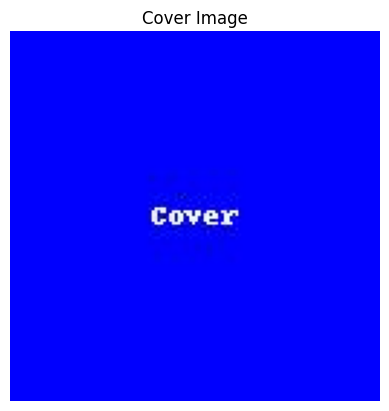

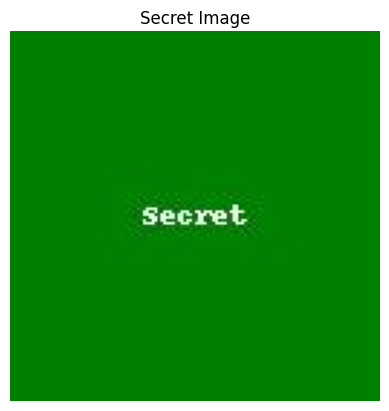

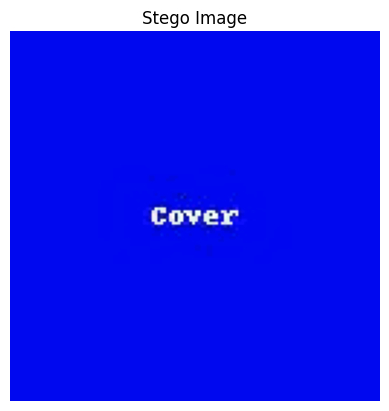

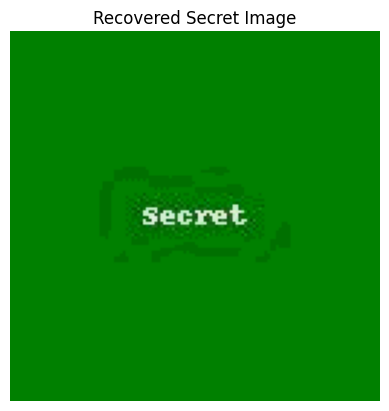

In [5]:
#  Step 5: Display results
def show(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

show(Image.open("/content/cover.jpg"), "Cover Image")
show(Image.open("/content/secret.jpg"), "Secret Image")
show(Image.open("/content/stego_image.png"), "Stego Image")
show(Image.open("/content/recovered_secret.png"), "Recovered Secret Image")